# Initial analysis of reasons for absence

First plots showing the overall distribution of the absence reasons in the data—that is, how many entries we have for a specific reason for absence in our dataset.

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/preprocessed_absenteism.csv")
dataset.head()

ID  Reason for absence Month of absence Day of the week Seasons  \
0  11                  26             July         Tuesday  Spring   
1  36                   0             July         Tuesday  Spring   
2   3                  23             July       Wednesday  Spring   
3   7                   7             July        Thursday  Spring   
4  11                  23             July        Thursday  Spring   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure    Education Son  \
0                 239.554  ...                    No  high_school   2   
1                 239.554  ...                   Yes  high_school   1   
2                 239.554  ...                    No  high_school   0   
3                 239.554  ...                    No  high_school   2   
4                 239.554  ...                    No  high_school   2   

   Social drinker Social smoker Pet  Weight  Height  Body mass index  \
0             Yes            No   1      90     172               30   
1             Yes            No   0      98     178               31   
2             Yes            No   0      89     170               31   
3             Yes           Yes   0      68     168               24   
4             Yes            No   1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

<a id="exploring-data"></a>
## Exploring dataset

In [4]:
# Printing dimensionality of the data, columns, types and missing values
print(f"Data dimension: {dataset.shape}")
for col in dataset.columns:
    print(
        f"Column: {col:35} | "
        f"type: {str(dataset[col].dtype):7} | "
        f"missing values: {dataset[col].isna().sum():3d}"
    )

Data dimension: (740, 21)
Column: ID                                  | type: int64   | missing values:   0
Column: Reason for absence                  | type: int64   | missing values:   0
Column: Month of absence                    | type: object  | missing values:   0
Column: Day of the week                     | type: object  | missing values:   0
Column: Seasons                             | type: object  | missing values:   0
Column: Transportation expense              | type: int64   | missing values:   0
Column: Distance from Residence to Work     | type: int64   | missing values:   0
Column: Service time                        | type: int64   | missing values:   0
Column: Age                                 | type: int64   | missing values:   0
Column: Work load Average/day               | type: float64 | missing values:   0
Column: Hit target                          | type: int64   | missing values:   0
Column: Disciplinary failure                | type: object  | missing va

In [5]:
# Computing statistics on numerical features
dataset.describe().T

count        mean        std      min  \
ID                               740.0   18.017568  11.021247    1.000   
Reason for absence               740.0   19.216216   8.433406    0.000   
Transportation expense           740.0  221.329730  66.952223  118.000   
Distance from Residence to Work  740.0   29.631081  14.836788    5.000   
Service time                     740.0   12.554054   4.384873    1.000   
Age                              740.0   36.450000   6.478772   27.000   
Work load Average/day            740.0  271.490235  39.058116  205.917   
Hit target                       740.0   94.587838   3.779313   81.000   
Son                              740.0    1.018919   1.098489    0.000   
Pet                              740.0    0.745946   1.318258    0.000   
Weight                           740.0   79.035135  12.883211   56.000   
Height                           740.0  172.114865   6.034995  163.000   
Body mass index                  740.0   26.677027   4.285452   19.000   
Absenteeism time in hours        740.0    6.924324  13.330998    0.000   

                                     25%      50%      75%      max  
ID                                 9.000   18.000   28.000   36.000  
Reason for absence                13.000   23.000   26.000   28.000  
Transportation expense           179.000  225.000  260.000  388.000  
Distance from Residence to Work   16.000   26.000   50.000   52.000  
Service time                       9.000   13.000   16.000   29.000  
Age                               31.000   37.000   40.000   58.000  
Work load Average/day            244.387  264.249  294.217  378.884  
Hit target                        93.000   95.000   97.000  100.000  
Son                                0.000    1.000    2.000    4.000  
Pet                                0.000    0.000    1.000    8.000  
Weight                            69.000   83.000   89.000  108.000  
Height                           169.000  170.000  172.000  196.000  
Body mass index                   24.000   25.000   31.000   38.000  
Absenteeism time in hours          2.000    3.000    8.000  120.000

1. Individual identification (ID)
2. Reason for absence (ICD). Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

    I Certain infectious and parasitic diseases
    II Neoplasms
    III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
    IV Endocrine, nutritional and metabolic diseases
    V Mental and behavioural disorders
    VI Diseases of the nervous system
    VII Diseases of the eye and adnexa
    VIII Diseases of the ear and mastoid process
    IX Diseases of the circulatory system
    X Diseases of the respiratory system
    XI Diseases of the digestive system
    XII Diseases of the skin and subcutaneous tissue
    XIII Diseases of the musculoskeletal system and connective tissue
    XIV Diseases of the genitourinary system
    XV Pregnancy, childbirth and the puerperium
    XVI Certain conditions originating in the perinatal period
    XVII Congenital malformations, deformations and chromosomal abnormalities
    XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
    XIX Injury, poisoning and certain other consequences of external causes
    XX External causes of morbidity and mortality
    XXI Factors influencing health status and contact with health services.

    And 7 categories without (CID)
    2. patient follow-up (22),
    3. medical consultation (23),
    4. blood donation (24),
    5. laboratory examination (25),
    6. unjustified absence (26),
    7. physiotherapy (27),
    8. dental consultation (28).

3. Month of absence
4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
5. Seasons (summer (1), autumn (2), winter (3), spring (4))
6. Transportation expense
7. Distance from Residence to Work (kilometers)
8. Service time
9. Age
10. Work load Average/day
11. Hit target
12. Disciplinary failure (yes=1; no=0)
13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
14. Son (number of children)
15. Social drinker (yes=1; no=0)
16. Social smoker (yes=1; no=0)
17. Pet (number of pet)
18. Weight
19. Height
20. Body mass index
21. Absenteeism time in hours (target)


<a id="reasons"></a>
## Reasons for absence

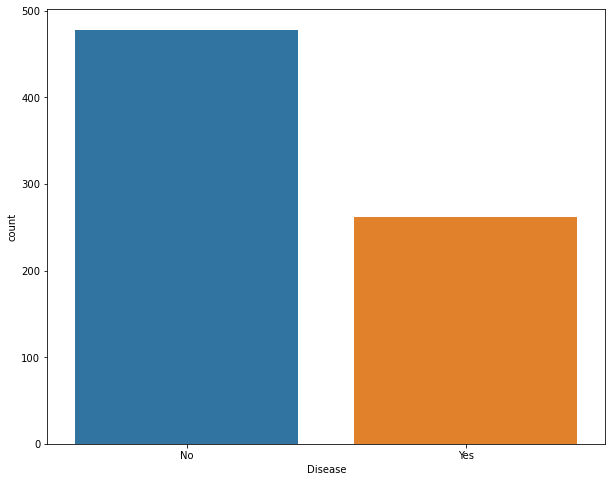

In [6]:
# Function to chedatasetck if the provided integer value is contained
# in the ICD or not
def in_icd(val):
    r = range(1, 22)
    return "Yes" if val in r else "No"


# add Disease column
dataset["Disease"] = dataset["Reason for absence"].apply(in_icd)

# plot value counts
plt.figure(figsize=(10, 8))
sns.countplot(data=dataset, x="Disease")
plt.savefig(f"{assets_path}/disease_plot.png", format="png", dpi=300)

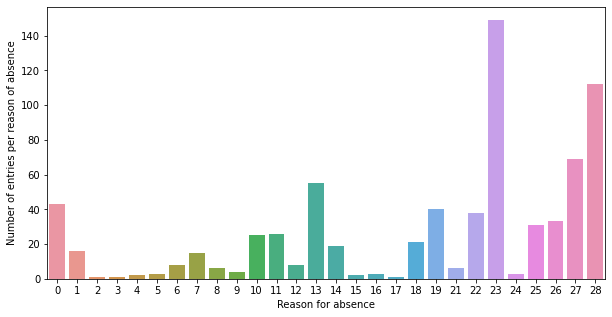

In [7]:
# Plotting number of entries for each reason for absence
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=dataset, x="Reason for absence")
ax.set_ylabel("Number of entries per reason of absence")
plt.savefig(
    f"{assets_path}/absence_reasons_distribution.png", format="png", dpi=300
)

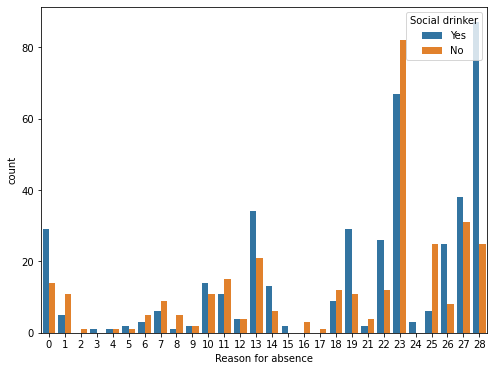

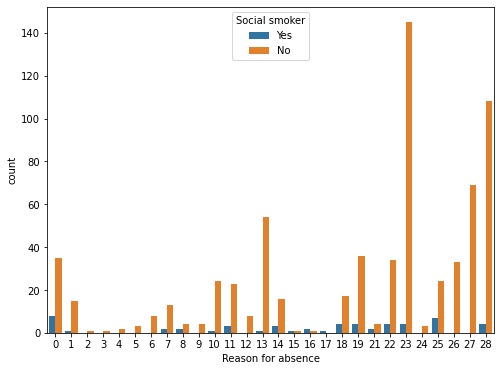

In [8]:
# Plotting reasons for absence against being a social drinker/smoker
plt.figure(figsize=(8, 6))
sns.countplot(
    data=dataset,
    x="Reason for absence",
    hue="Social drinker",
    hue_order=["Yes", "No"],
)
plt.savefig(
    f"{assets_path}/absence_reasons_drinkers.png", format="png", dpi=300
)

plt.figure(figsize=(8, 6))
sns.countplot(
    data=dataset,
    x="Reason for absence",
    hue="Social smoker",
    hue_order=["Yes", "No"],
)
plt.savefig(
    f"{assets_path}/absence_reasons_smokers.png", format="png", dpi=300
)

In [9]:
# Calculating the actual count for social drinkers and smokers
# from the preprocessed data
print(dataset["Social drinker"].value_counts(normalize=True))
print(dataset["Social smoker"].value_counts(normalize=True))

Yes    0.567568
No     0.432432
Name: Social drinker, dtype: float64
No     0.927027
Yes    0.072973
Name: Social smoker, dtype: float64
